In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import requests
from bs4 import BeautifulSoup

In [3]:
url = "https://taqm.epa.gov.tw/pm25/tw/PM25A.aspx?area=10"
res = requests.get(url)
soup = BeautifulSoup(res.text)
print(soup.title.text)


	行政院環保署-細懸浮微粒



In [4]:
pm = []
for i in range(2,80):
    i = str(i)
    if int(i) < 10:
        i = i.zfill(2)
    id_pm = '#ctl08_gv_ctl'+str(i)+'_lab1'
    t = soup.select(id_pm)
    pm = pm + t
for j in range(len(pm)):
    pm[j] = pm[j].text
    if pm[j]==''or pm[j]=='ND':
        pm[j]='0'
pm = list(map(int,pm))

In [5]:
loc = []
for i in range(2,80):
    i = str(i)
    if int(i) < 10:
        i = i.zfill(2)
    id_loc = '#ctl08_gv_ctl'+str(i)+'_linkSite'
    t = soup.select(id_loc)
    loc = loc + t
for j in range(len(loc)):
    loc[j] = loc[j].text    

In [6]:
dic = dict(zip(loc,pm))

In [11]:
a = (dic['陽明']+dic['士林']+dic['大同']+dic['中山']+dic['松山']+dic['萬華']+dic['古亭'])/7
b = (dic['豐原']+dic['沙鹿']+dic['西屯']+dic['忠明']+dic['大里'])/5
c = (dic['基隆'])
d = (dic['新營']+dic['善化']+dic['安南']+dic['臺南'])/4
e = (dic['美濃']+dic['橋頭']+dic['楠梓']+dic['仁武']+dic['左營']+dic['前金']+dic['鳳山']+dic['復興']+dic['前鎮']+dic['小港']+dic['大寮']+dic['林園'])/12
f = (dic['富貴角']+dic['萬里']+dic['淡水']+dic['林口']+dic['三重']+dic['菜寮']+dic['汐止']+dic['新莊']+dic['永和']+dic['板橋']+dic['土城']+dic['新店'])/12
g = (dic['宜蘭']+dic['冬山'])/2
h = (dic['大園']+dic['觀音']+dic['桃園']+dic['平鎮']+dic['中壢']+dic['龍潭'])/6
i = (dic['嘉義'])
j = (dic['湖口']+dic['竹東'])/2
k = (dic['頭份']+dic['苗栗']+dic['三義'])/3
m = (dic['埔里']+dic['南投']+dic['竹山'])/3
n = (dic['線西']+dic['彰化']+dic['二林'])/3
o = (dic['新竹'])
p = (dic['崙背']+dic['麥寮']+dic['臺西']+dic['斗六'])/4
q = (dic['新港']+dic['朴子'])/2
t = (dic['屏東']+dic['潮州']+dic['恆春'])/3
u = (dic['花蓮'])
v = (dic['關山']+dic['臺東'])/2
w = (dic['金門'])
x = (dic['馬公'])
z = (dic['馬祖']+dic['馬祖東引'])/2
county = {'countyid':['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'M', 'N', 'O', 'P', 'Q', 'T', 'U', 'V', 'W', 'X', 'Z'],
          'pm25' :[a, b, c, d, e, f, g, h, i, j, k, m, n, o, p, q, t, u, v, w, x, z]}

Populating the interactive namespace from numpy and matplotlib


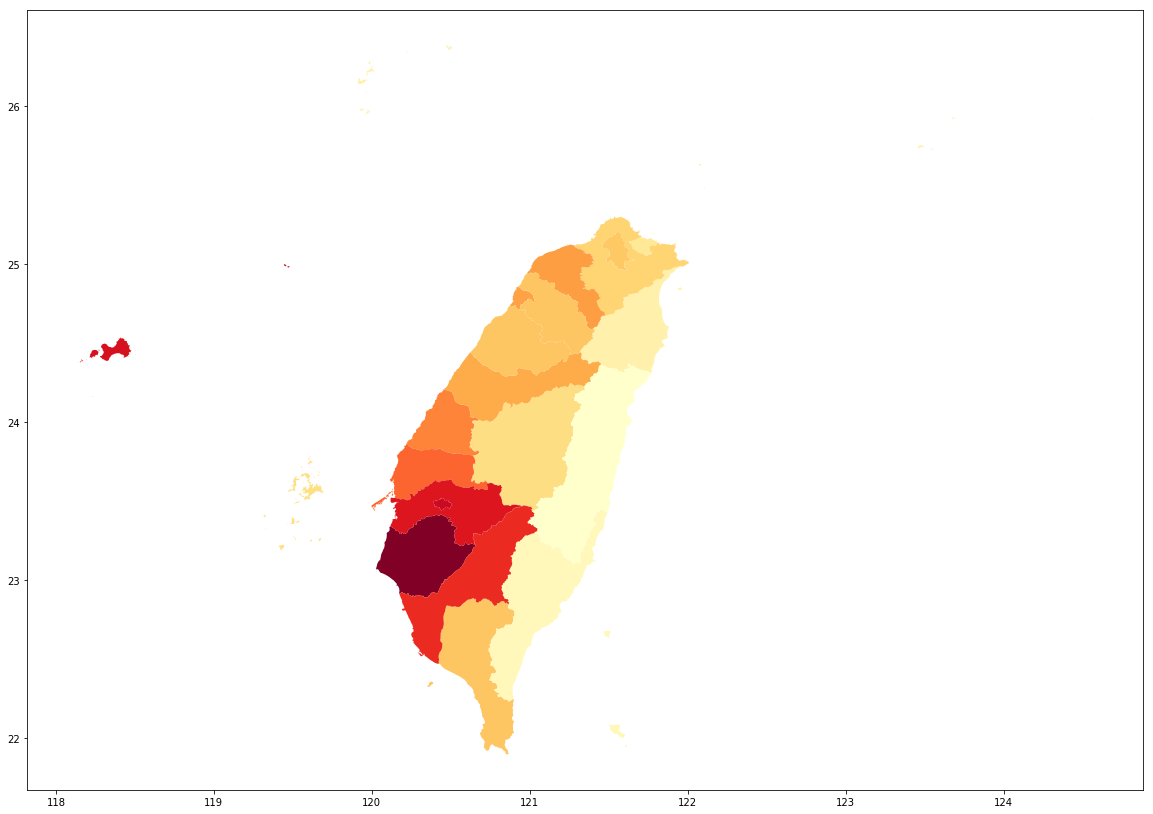

In [12]:
%pylab inline
pylab.rcParams['figure.figsize'] = (20.0, 20.0)
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import pandas as pd

town_shp = gpd.read_file('/Users/wutonytt/finalproject/twmap/COUNTY_MOI_1070516.shp')
county_df = pd.DataFrame.from_dict(county)
town_shp_merge = town_shp.merge(county_df, left_on=('COUNTYID'), right_on=('countyid'))
town_shp_merge.plot(
    cmap=plt.cm.YlOrRd,
    column='pm25'
)
plt.show()